In [1]:
import pandas as pd
import numpy as np
from numpy import inf
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import explained_variance_score, mean_squared_error, max_error, mean_absolute_error
from sklearn.model_selection import KFold
from scipy.stats import pearsonr
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import LogisticRegression

# Importation of data and definition of X and Y variables

In [2]:
df = pd.read_csv("parkinsons_updrs.data")

In [3]:
df.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [4]:
df.tail()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
5870,42,61,0,142.79,22.485,33.485,0.00406,0.000031,0.00167,0.00168,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,0,149.84,21.988,32.988,0.00297,0.000025,0.00119,0.00147,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,0,156.82,21.495,32.495,0.00349,0.000025,0.00152,0.00187,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,0,163.73,21.007,32.007,0.00281,0.000020,0.00128,0.00151,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204
5874,42,61,0,170.73,20.513,31.513,0.00282,0.000021,0.00135,0.00166,...,0.171,0.00946,0.01154,0.01470,0.02839,0.008172,23.259,0.58608,0.57077,0.15336


In [5]:
X = df.drop(["subject#", "age", "sex", "test_time", "motor_UPDRS", "total_UPDRS"], axis = 1)

In [6]:
X

,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,0.00406,0.000031,0.00167,0.00168,0.00500,0.01896,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,0.00297,0.000025,0.00119,0.00147,0.00358,0.02315,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,0.00349,0.000025,0.00152,0.00187,0.00456,0.02499,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,0.00281,0.000020,0.00128,0.00151,0.00383,0.01484,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


Definition of Yr (for regression) and Yc (for classification).

In [7]:
Yr = np.array(df["motor_UPDRS"])

In [8]:
Yr

array([28.199, 28.447, 28.695, ..., 21.495, 21.007, 20.513])

In [9]:
Yc = np.array([int(i > 40) for i in df["total_UPDRS"]])

In [10]:
Yc

array([0, 0, 0, ..., 0, 0, 0])

In [11]:
vals, counts= np.unique(Yc, return_counts=True)
for v, c in zip(vals, counts):
    print(v, "--->", c)

0 ---> 4869
1 ---> 1006


# Regression

In [12]:
#1.First separate the dataset into a Training Set and an Independent Validation Set (IVS).
X_TRAIN, X_IVS, y_TRAIN, y_IVS = train_test_split(X.values, Yr, test_size=0.25, random_state=123)

### Decision Tree Regressor

In [13]:
#2. Use the Training Set for n-Fold Cross Validation

kf = KFold(n_splits=5, shuffle=True, random_state = 1)
best_rmse = inf
for s in ["best","random"]:
    for md in range(1, 10):
        for msl in range(1,5):
            for mwfl in [0.1,0.2,0.3,0.4,0.5]:
                for mf in ["auto","log2","sqrt",None]:
                    for mln in [None,10,20,30,40,50,60,70,80,90]:
                        TRUTH=None
                        PREDS=None
                        for train_index, test_index in kf.split(X_TRAIN):
                            X_train, X_test = X_TRAIN[train_index, :], X_TRAIN[test_index, :]
                            y_train, y_test = y_TRAIN[train_index], y_TRAIN[test_index]
                            model = tree.DecisionTreeRegressor(splitter = s, max_depth = md, min_samples_leaf = msl,
                                                              min_weight_fraction_leaf=mwfl, max_features=mf, max_leaf_nodes=mln)
                            model.fit(X_train, y_train)
                            preds = model.predict(X_test)
                            if TRUTH is None:
                                PREDS=preds
                                TRUTH=y_test
                            else:
                                PREDS=np.hstack((PREDS, preds))
                                TRUTH=np.hstack((TRUTH, y_test))
                        #3. evaluate the resulting model with mse
                        rmse =  mean_squared_error(TRUTH, PREDS, squared=False)
                        if best_rmse > rmse:
                            best_rmse = rmse
                            best_dtr = model

print("The best decision tree regressor has parameters:", best_dtr.get_params(), "and RMSE:", best_rmse)

The best decision tree regressor has parameters: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 4, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.1, 'random_state': None, 'splitter': 'best'} and RMSE: 7.732927649867136


### Linear Regression

In [14]:
from statsmodels.api import OLS,  add_constant
X_tr = add_constant(X_TRAIN)
mdl=OLS(y_TRAIN,X_tr, hasconst=12).fit()
mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     32.48
Date:                Sat, 22 Oct 2022   Prob (F-statistic):           1.68e-94
Time:                        09:37:47   Log-Likelihood:                -15229.
No. Observations:                4406   AIC:                         3.049e+04
Df Residuals:                    4389   BIC:                         3.060e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.4726      2.666     17.432      0.000      41.246      51.699
x1           355.9482    190.884      1.865      0.062     -18.281     730.177
x2          -4.78e+04   8190.525     -5.836      0.000   -6.39e+04   -3.17e+04
x3         -5.557e+04   4.26e+04     -1.306      0.192   -1.39e+05    2.79e+04
x4          -171.4468    166.722     -1.028      0.304    -498.307     155.413
x5           1.85e+04   1.42e+04      1.304      0.192   -9318.791    4.63e+04
x6            83.2846     56.591      1.472      0.141     -27.662     194.232
x7            -1.3977      4.335     -0.322      0.747      -9.897       7.102
x8         -8650.2732   4.28e+04     -0.202      0.840   -9.27e+04    7.54e+04
x9          -166.0280     50.747     -3.272      0.001    -265.517     -66.539
x10          101.1653     22.294      4.538      0.000      57.458     144.873
x11         2849.3160   1.43e+04      0.199      0.842   -2.52e+04    3.09e+04
x12          -20.3850      5.501     -3.706      0.000     -31.169      -9.601
x13           -0.4564      0.062     -7.323      0.000      -0.579      -0.334
x14           -0.8465      1.654     -0.512      0.609      -4.090       2.397
x15          -27.8228      2.053    -13.553      0.000     -31.847     -23.798
x16           20.6865      2.654      7.795      0.000      15.484      25.889
==============================================================================
Omnibus:                      368.531   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.775
Skew:                           0.160   Prob(JB):                     1.47e-29
Kurtosis:                       2.212   Cond. No.                     8.62e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.62e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Variaveis que ficam: x2 [1], x9 [8], x10 [9], x12 [11], x13 [12], x15 [14], x16 [15]

In [15]:
stay = [1, 8, 9, 11, 12, 14, 15]

In [16]:
X_TRAIN2 = np.array([[X_TRAIN[j][i] for i in stay] for j in range(len(X_TRAIN))])

In [17]:
X_tr2 = add_constant(X_TRAIN2)
mdl2=OLS(y_TRAIN,X_tr2, hasconst=12).fit()
mdl2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     70.60
Date:                Sat, 22 Oct 2022   Prob (F-statistic):           4.40e-97
Time:                        09:37:48   Log-Likelihood:                -15241.
No. Observations:                4406   AIC:                         3.050e+04
Df Residuals:                    4398   BIC:                         3.055e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.8074      2.066     21.204      0.000      39.757      47.858
x1          -3.15e+04   6318.384     -4.986      0.000   -4.39e+04   -1.91e+04
x2          -173.9764     25.213     -6.900      0.000    -223.407    -124.546
x3           127.1037     17.784      7.147      0.000      92.239     161.969
x4            -7.6617      4.087     -1.875      0.061     -15.674       0.351
x5            -0.3939      0.055     -7.157      0.000      -0.502      -0.286
x6           -26.7468      1.983    -13.490      0.000     -30.634     -22.860
x7            23.1486      2.421      9.563      0.000      18.403      27.894
==============================================================================
Omnibus:                      436.351   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.412
Skew:                           0.177   Prob(JB):                     9.77e-33
Kurtosis:                       2.177   Cond. No.                     1.20e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Ridge Regression

In [18]:
#2. Use the Training Set for n-Fold Cross Validation

best_rmse_test = inf
rmse_train = []
rmse_test = []
alphas = 2**np.arange(-2, -10, -.05)
for alpha in alphas:
    TRUTH_TRAIN = None
    TRUTH_TEST = None
    PREDS_TRAIN = None
    PREDS_TEST = None
    for train_index, test_index in kf.split(X_TRAIN):
        X_train, X_test = X_TRAIN[train_index, :], X_TRAIN[test_index, :]
        y_train, y_test = y_TRAIN[train_index], y_TRAIN[test_index]
        ridge = Ridge(alpha=alpha, max_iter=100000).fit(X_train, y_train)
        preds_tr=ridge.predict(X_train)
        preds_te=ridge.predict(X_test)
        if TRUTH_TRAIN is None:
            PREDS_TRAIN = preds_tr
            PREDS_TEST = preds_te
            TRUTH_TRAIN = y_train
            TRUTH_TEST = y_test
        else:
            PREDS_TRAIN = np.hstack((PREDS_TRAIN, preds_tr))
            PREDS_TEST = np.hstack((PREDS_TEST, preds_te))
            TRUTH_TRAIN = np.hstack((TRUTH_TRAIN, y_train))
            TRUTH_TEST = np.hstack((TRUTH_TEST, y_test))
    #3. evaluate the resulting model with rmse
    rmse_train.append(mean_squared_error(TRUTH_TRAIN, PREDS_TRAIN, squared=False))
    rmse_test.append(mean_squared_error(TRUTH_TEST, PREDS_TEST, squared=False))
    if mean_squared_error(TRUTH_TEST, PREDS_TEST, squared=False) < best_rmse_test:
        best_rmse_test = mean_squared_error(TRUTH_TEST, PREDS_TEST, squared=False)
        best_alpha = alpha
print("best alpha:", best_alpha)
print("best rmse:", best_rmse_test)

best alpha: 0.008668511500530142
best rmse: 7.724038425264214


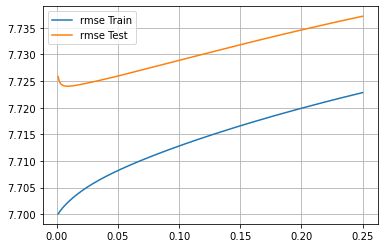

In [19]:
plt.plot(alphas, rmse_train, label="rmse Train")    
plt.plot(alphas, rmse_test, label="rmse Test")    
plt.grid()
plt.legend()
plt.show()

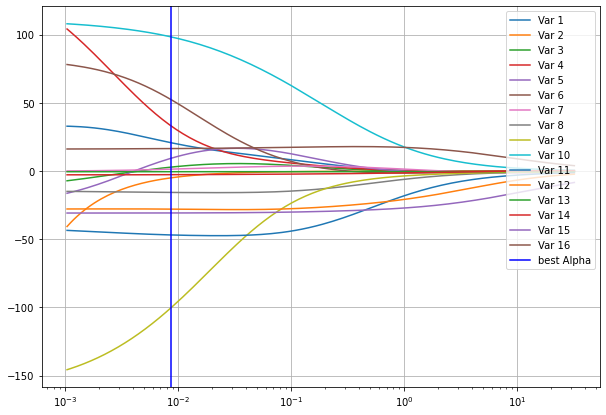

In [20]:
#compute coefficients for many alpha values
coefs=[]
alphas=2**np.arange(5,-10,-.1)
for alpha in alphas:
    ridge= Ridge(alpha=alpha, max_iter=100000).fit(X_TRAIN, y_TRAIN)
    coefs.append(ridge.coef_)
coefs=np.array(coefs)

#plot results
N,M=X_TRAIN.shape
plt.figure(figsize=(10,7))
for i in range(M):
    plt.plot(alphas, coefs[:,i], label="Var %d" % (i+1))
plt.axvline(x = best_alpha, color = 'b', label = 'best Alpha')
plt.xscale("log")
plt.legend(loc='upper right')
plt.grid()
plt.show()

### Lasso Regression

In [21]:
#2. Use the Training Set for n-Fold Cross Validation

best_rmse_test = inf
rmse_train = []
rmse_test = []
alphas = 2**np.arange(-2, -10, -.05)
for alpha in alphas:
    TRUTH_TRAIN = None
    TRUTH_TEST = None
    PREDS_TRAIN = None
    PREDS_TEST = None
    for train_index, test_index in kf.split(X_TRAIN):
        X_train, X_test = X_TRAIN[train_index, :], X_TRAIN[test_index, :]
        y_train, y_test = y_TRAIN[train_index], y_TRAIN[test_index]
        L = Lasso(alpha=alpha, max_iter=100000).fit(X_train, y_train)
        preds_tr=L.predict(X_train)
        preds_te=L.predict(X_test)
        if TRUTH_TRAIN is None:
            PREDS_TRAIN = preds_tr
            PREDS_TEST = preds_te
            TRUTH_TRAIN = y_train
            TRUTH_TEST = y_test
        else:
            PREDS_TRAIN = np.hstack((PREDS_TRAIN, preds_tr))
            PREDS_TEST = np.hstack((PREDS_TEST, preds_te))
            TRUTH_TRAIN = np.hstack((TRUTH_TRAIN, y_train))
            TRUTH_TEST = np.hstack((TRUTH_TEST, y_test))
    #3. evaluate the resulting model with rmse
    rmse_train.append(mean_squared_error(TRUTH_TRAIN, PREDS_TRAIN, squared=False))
    rmse_test.append(mean_squared_error(TRUTH_TEST, PREDS_TEST, squared=False))
    if mean_squared_error(TRUTH_TEST, PREDS_TEST, squared=False) < best_rmse_test:
        best_rmse_test = mean_squared_error(TRUTH_TEST, PREDS_TEST, squared=False)
        best_alpha = alpha
print("best alpha:", best_alpha)
print("best rmse:", best_rmse_test)

best alpha: 0.0010110009021888657
best rmse: 7.731844331098596


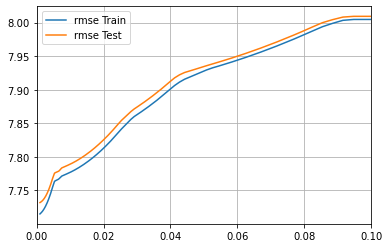

In [22]:
plt.plot(alphas, rmse_train, label="rmse Train")    
plt.plot(alphas, rmse_test, label="rmse Test")  
plt.grid()
plt.xlim(0,0.1)
plt.legend()
plt.show()

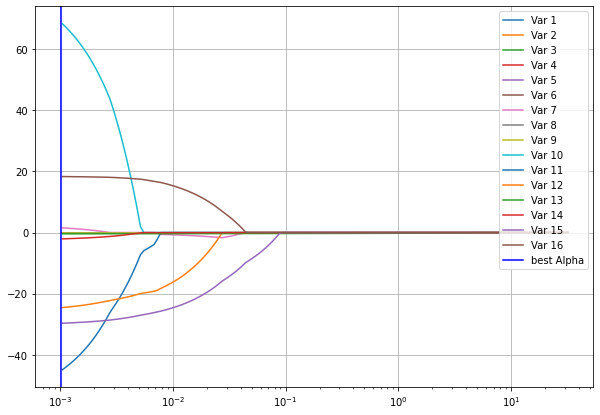

In [23]:
#compute coefficients for many alpha values
coefs=[]
alphas=2**np.arange(5,-10,-.1)
for alpha in alphas:
    L= Lasso(alpha=alpha, max_iter=100000).fit(X_TRAIN, y_TRAIN)
    coefs.append(L.coef_)
coefs=np.array(coefs)

#plot results
N,M=X_TRAIN.shape
plt.figure(figsize=(10,7))
for i in range(M):
    plt.plot(alphas, coefs[:,i], label="Var %d" % (i+1))
plt.axvline(x = best_alpha, color = 'b', label = 'best Alpha')
plt.xscale("log")
plt.legend(loc='upper right')
plt.grid()
plt.show()

### Model Validation

In [24]:
#4. Fit a new model with all the Training Set Data using the selected model
model = Ridge(alpha=0.008668511500530142, max_iter=100000)
model.fit(X_TRAIN, y_TRAIN)

Ridge(alpha=0.008668511500530142, max_iter=100000)

In [25]:
#5. Use the IVS to assess the  model quality
ivs_preds = model.predict(X_IVS)

In [26]:
def printRegStatistics(truth, preds):
    print("The RVE is: ", explained_variance_score(truth, preds))
    print("The rmse is: ", mean_squared_error(truth, preds, squared=False))
    corr, pval = pearsonr(truth, preds)
    print("The Correlation Score is is: %6.4f (p-value=%e)\n"%(corr,pval))
    print("The Maximum Error is is: ", max_error(truth, preds))
    print("The Mean Absolute Error is: ", mean_absolute_error(truth, preds))

In [27]:
print("These are the testing set statistics:")
printRegStatistics(y_IVS, ivs_preds)

These are the testing set statistics:
The RVE is:  0.10082289301363301
The rmse is:  7.754671500165321
The Correlation Score is is: 0.3182 (p-value=6.538159e-36)

The Maximum Error is is:  19.09144291185206
The Mean Absolute Error is:  6.573919178000186


# Classification

In [28]:
#1.First separate the dataset into a Training Set and an Independent Validation Set (IVS).
X_TRAIN, X_IVS, y_TRAIN, y_IVS = train_test_split(X.values, Yc, test_size=0.25, random_state=123)

In [29]:
#2. Use the Training Set for n-Fold Cross Validation

kf = KFold(n_splits=5, shuffle=True, random_state = 1)
best_mcc_dt = 0
for c in ["gini", "entropy"]:
    for md in range(1,10):
        for mss in range(2,10):
            for msl in range(1,5):
                TRUTH=None
                PREDS=None
                for train_index, test_index in kf.split(X_TRAIN):
                    X_train, X_test = X_TRAIN[train_index, :], X_TRAIN[test_index, :]
                    y_train, y_test = y_TRAIN[train_index], y_TRAIN[test_index]
                    model = tree.DecisionTreeClassifier(criterion = c, max_depth = md, min_samples_split = mss, min_samples_leaf = msl)
                    model.fit(X_train, y_train)
                    preds = model.predict(X_test)
                    if TRUTH is None:
                        PREDS=preds
                        TRUTH=y_test
                    else:
                        PREDS=np.hstack((PREDS, preds))
                        TRUTH=np.hstack((TRUTH, y_test))
                #3. evaluate the resulting model with mcc
                mcc = matthews_corrcoef(TRUTH, PREDS)
                if mcc > best_mcc_dt:
                    best_mcc_dt = mcc
                    best_dt = model

print("The best decision tree has parameters:", best_dt.get_params(), "and MCC:", best_mcc_dt)

The best decision tree has parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 7, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 6, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'} and MCC: 0.17722420043010914


In [30]:
TRUTH=None
PREDS=None
for train_index, test_index in kf.split(X_TRAIN):
    X_train, X_test = X_TRAIN[train_index, :], X_TRAIN[test_index, :]
    y_train, y_test = y_TRAIN[train_index], y_TRAIN[test_index]
    model = LogisticRegression(max_iter = 1000)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    if TRUTH is None:
        PREDS=preds
        TRUTH=y_test
    else:
        PREDS=np.hstack((PREDS, preds))
        TRUTH=np.hstack((TRUTH, y_test))
mcc = matthews_corrcoef(TRUTH, PREDS)
print("MCC for logistic regression:", mcc)

MCC for logistic regression: 0.0


In [31]:
#4. Fit a new model with all the Training Set Data using the selected model
model = best_dt
model.fit(X_TRAIN, y_TRAIN)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=6)

In [32]:
#5. Use the IVS to assess the  model quality
ivs_preds = model.predict(X_IVS)

In [33]:
print("These are the testing set statistics:")
print("The Precision is: %7.4f" % precision_score(y_IVS, ivs_preds))
print("The Recall is: %7.4f" % recall_score(y_IVS, ivs_preds))
print("The F1 score is: %7.4f" % f1_score(y_IVS, ivs_preds))
print("The Matthews correlation coefficient is: %7.4f" % matthews_corrcoef(y_IVS, ivs_preds))

These are the testing set statistics:
The Precision is:  0.5370
The Recall is:  0.1094
The F1 score is:  0.1818
The Matthews correlation coefficient is:  0.1812


This is the Confusion Matrix


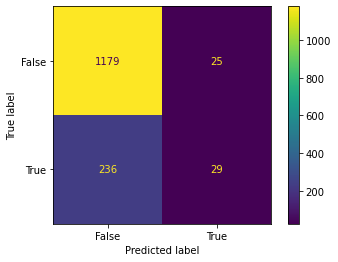

In [34]:
print("This is the Confusion Matrix")
cm = confusion_matrix(y_IVS, ivs_preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()